In [2]:
#Angelica Seon Mee Joo
import io 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import requests 
url = 'https://github.com/vinc3creed/datasciencecoursera/raw/master/Advertising.csv'
read_data=requests.get(url).content
read_data

b'"","TV","Radio","Newspaper","Sales"\r\n"1",230.1,37.8,69.2,22.1\r\n"2",44.5,39.3,45.1,10.4\r\n"3",17.2,45.9,69.3,9.3\r\n"4",151.5,41.3,58.5,18.5\r\n"5",180.8,10.8,58.4,12.9\r\n"6",8.7,48.9,75,7.2\r\n"7",57.5,32.8,23.5,11.8\r\n"8",120.2,19.6,11.6,13.2\r\n"9",8.6,2.1,1,4.8\r\n"10",199.8,2.6,21.2,10.6\r\n"11",66.1,5.8,24.2,8.6\r\n"12",214.7,24,4,17.4\r\n"13",23.8,35.1,65.9,9.2\r\n"14",97.5,7.6,7.2,9.7\r\n"15",204.1,32.9,46,19\r\n"16",195.4,47.7,52.9,22.4\r\n"17",67.8,36.6,114,12.5\r\n"18",281.4,39.6,55.8,24.4\r\n"19",69.2,20.5,18.3,11.3\r\n"20",147.3,23.9,19.1,14.6\r\n"21",218.4,27.7,53.4,18\r\n"22",237.4,5.1,23.5,12.5\r\n"23",13.2,15.9,49.6,5.6\r\n"24",228.3,16.9,26.2,15.5\r\n"25",62.3,12.6,18.3,9.7\r\n"26",262.9,3.5,19.5,12\r\n"27",142.9,29.3,12.6,15\r\n"28",240.1,16.7,22.9,15.9\r\n"29",248.8,27.1,22.9,18.9\r\n"30",70.6,16,40.8,10.5\r\n"31",292.9,28.3,43.2,21.4\r\n"32",112.9,17.4,38.6,11.9\r\n"33",97.2,1.5,30,9.6\r\n"34",265.6,20,0.3,17.4\r\n"35",95.7,1.4,7.4,9.5\r\n"36",290.7,4.1,8.5

In [6]:
data=pd.read_csv(io.StringIO(read_data.decode('utf-8')))
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [9]:
data.shape

(200, 5)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [11]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [12]:
#Data cleaning
data.isnull().sum()*100/data.shape[0]

Unnamed: 0    0.0
TV            0.0
Radio         0.0
Newspaper     0.0
Sales         0.0
dtype: float64

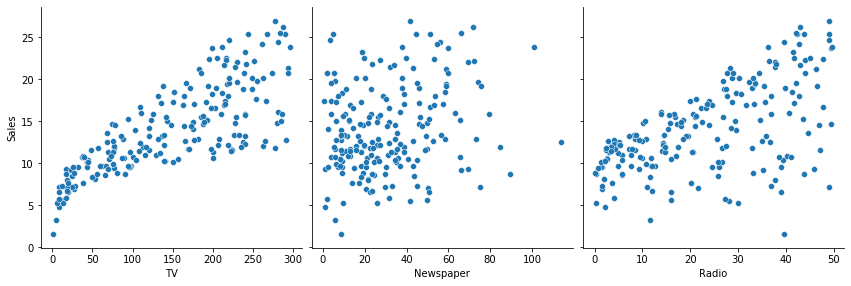

In [14]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

In [16]:
X = data['TV']
y = data['Sales']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)


In [18]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [19]:
y_train.head()

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
Name: Sales, dtype: float64

In [20]:
import statsmodels.api as sm

In [21]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

In [22]:
lr.params

const    6.989666
TV       0.046497
dtype: float64

In [23]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Sun, 14 Mar 2021   Prob (F-statistic):           2.84e-30
Time:                        11:04:19   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9897      0.548     12.762      0.0

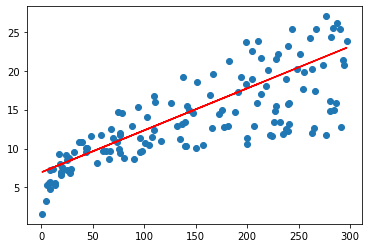

In [24]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

In [25]:
#for model evaluation
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


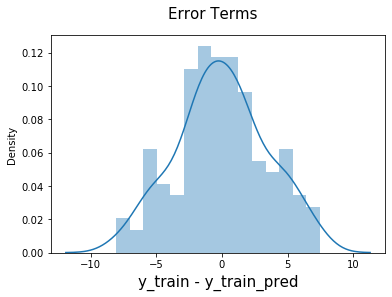

In [26]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

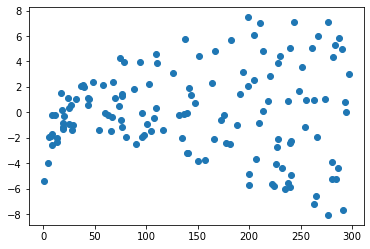

In [27]:
plt.scatter(X_train,res)
plt.show()

In [28]:
#predictions on test set
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)


In [29]:
y_pred.head()

126     7.352345
104    18.065337
99     13.276109
92     17.112141
111    18.228077
dtype: float64

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [31]:
#RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

2.8241456288327003

In [32]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.5942987267783303

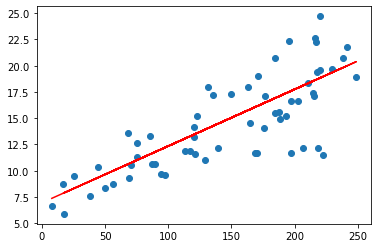

In [33]:
#visualizing fit on test set
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()